# ESTUDO
## Problema

Fomos abordados por um cliente que tem um processo industrial que transforma matéria-prima em
peças. Uma visão geral do processo é dada na figura abaixo. A saída do processo, representada
pela variável PESO_PECA, pode ser interpretada como o peso médio do lote de peças produzido.
Além disso, temos 3 variáveis de processo: QTD_MAT_PRIMA, VAR_1 e VAR_2. **A única
variável que podemos controlar é QTD_MAT_PRIMA, a quantidade de matéria-prima na entrada
do processo**. As outras duas variáveis não são controláveis por motivos diversos e não têm
significado físico evidente.

O cliente mostrou preocupação com o controle de qualidade do seu processo industrial. **O peso de
uma peça deve ser de 100 gramas**. Normas de qualidade estabelecem um limite de variação do
peso da peça de 10% somente para baixo. **Ou seja, se uma peça pesar menos que 90 gramas, ela é
considerada não-conforme e descartada**. Não há nenhuma norma estabelecendo um limite superior
para o peso das peças, porém os custos de produção aumentam à medida que peças acima do peso
são produzidas. O gerente da qualidade da empresa compartilhou com a equipe uma métrica de
custo empregada para medir a eficiência do processo, mostrada na figura abaixo. **O custo é mínimo
no peso esperado das peças de 100 gramas e aumenta abruptamente à medida que o peso se
aproxima de 90 gramas**, para modelar o descarte de peças. Além disso, o custo também aumenta
com o excesso de peso, apesar deste aumento ser mais suave.

A métrica de custo C(p) relaciona-se com o peso p das peças segundo a seguinte fórmula:

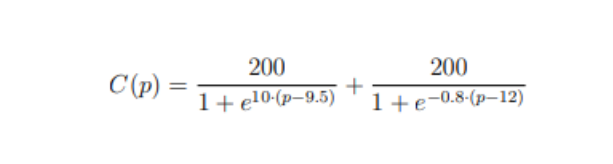

O grande problema enfrentado pelo cliente é a variabilidade no processo. Nas palavras do gerente
da qualidade:

**"Estamos tendo dificuldade para modelar nosso processo industrial. As diferentes variáveis de
processo impactam de maneira diferente o peso final das peças, além de introduzir diferentes
níveis de incerteza no processo. Não estamos conseguindo lidar com esta incerteza."**

Para ilustrar seu ponto, o gerente mostrou duas comparações. Na primeira tabela, temos o valor da
variável PESO_PECA para a mesma quantidade da variável QTD_MAT_PRIMA, mas para
diferentes valores de VAR_1 e VAR_2, ilustrando o impacto das variáveis não controláveis no
processo. Além disso, para ilustrar a incerteza no processo, o cliente exibiu o valor da variável
PECO_PECA para diferentes rodadas de produção com as variáveis QTD_MAT_PRIMA, VAR 1
e VAR 2 fixas, mostrado seguna tabela.

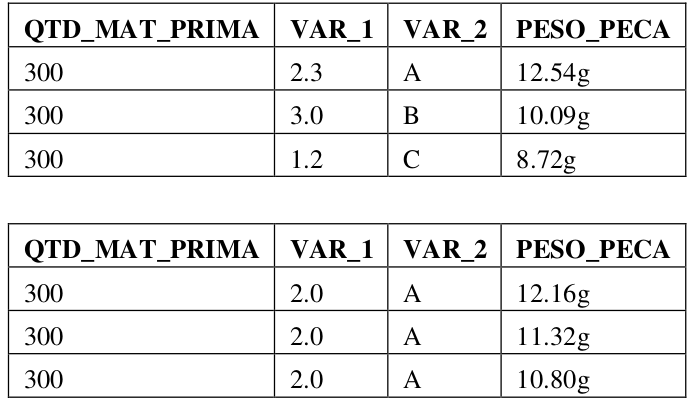

O objetivo do cliente com este projeto é identificar pontos de melhoria no processo, além de obter
um plano de produção (valores ótimos da quantidade de matéria-prima QTD_MAT_PRIMA)
visando a minimização da métrica de custo. Foi fornecida uma tabela com 500 registros de
produção, mapeando o peso da peça para diversas condições de produção, disponível em anexo.

# Analise Descritiva

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:

registros = pd.read_excel('registros-prod.xlsx')
registros.head()

,QTD_MAT_PRIMA,VAR_1,VAR_2,PESO_PECA
0,320.15,0.88,A,10.144919
1,320.14,1.55,A,11.547027
2,284.85,2.97,A,11.112109
3,263.92,2.36,C,9.900123
4,276.22,2.98,C,10.079822


In [5]:
# Identificando a presença de valores nulos

registros.isnull().sum()



QTD_MAT_PRIMA    0
VAR_1            0
VAR_2            0
PESO_PECA        0
dtype: int64

In [5]:
# Quais variaveis são categóricas?

registros.dtypes

# VAR_2 e categorica, valores unicos A B C 

registros['VAR_2'].unique() 



array(['A', 'C', 'B'], dtype=object)

In [3]:
registros.describe()

,QTD_MAT_PRIMA,VAR_1,PESO_PECA
count,500.000000,500.000000,500.000000
mean,291.264600,2.098180,10.395002
std,45.182499,0.711166,1.572233
min,112.910000,0.050000,4.543124
25%,259.267500,1.630000,9.425819
50%,295.450000,2.300000,10.334273
75%,325.137500,2.672500,11.379932
max,436.070000,2.980000,17.362728


In [12]:

# # Coeficiente de variação de QTD_MAT_PRIMA

registros['QTD_MAT_PRIMA'].std() / registros['QTD_MAT_PRIMA'].mean()



0.15512526833920032

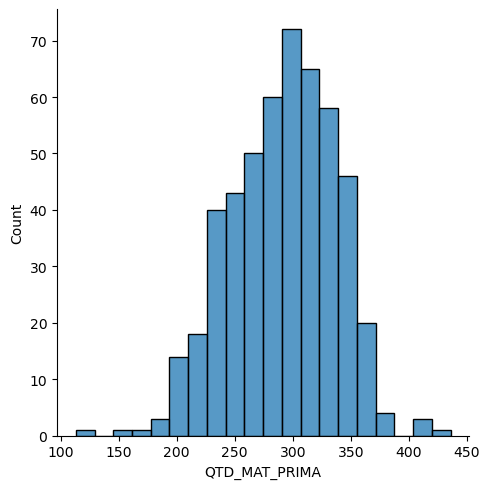

In [6]:
# Entendendo a distribuição da variável QTD_MAT_PRIMA
sns.displot(registros['QTD_MAT_PRIMA'])
plt.show()


Ha maior uso de quantidades de materia prima na faixa de `200` ate `360`.

A media de materia prima utilizada e de `291.26`

O desvio padrao da quantidade de materia prima e de `45.18`. Isso sugere que há uma certa variabilidade nos quantitativos de matéria-prima utilizados, o que pode ter implicações na gestão do processo, como a necessidade de controlar melhor a quantidade de matéria-prima utilizada para evitar desperdícios ou garantir a consistência na produção.

o coeficiente de variacao é cerca de `15.51%`.

Mesmo que o desvio padrão seja alto (o que significa que os valores variam muito), o coeficiente de variação é baixo (o que significa que essa variação não é tão grande em relação à média). Isso sugere que, apesar da variação absoluta nos quantitativos de matéria-prima utilizados, essa variação não é tão grande em relação à média, o que pode indicar uma relativa estabilidade ou consistência no processo.

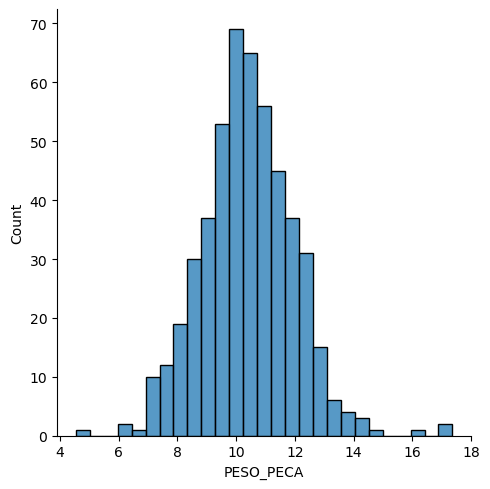

In [8]:
# Entendendo a distribuição da variável Peso_Peca   
sns.displot(registros['PESO_PECA'])

In [13]:
# coefinete de variação de PESO_PECA

registros['PESO_PECA'].std() / registros['PESO_PECA'].mean()

0.15124890600100976


Ha uma maioria de pecas na faixa de peso de `8g` a `13g`.

A media de peso das pecas e de `10.39g`

O desvio padrao do peso da peca e de `1.57`. 

o coeficiente de variacao é cerca de `15.12%`.


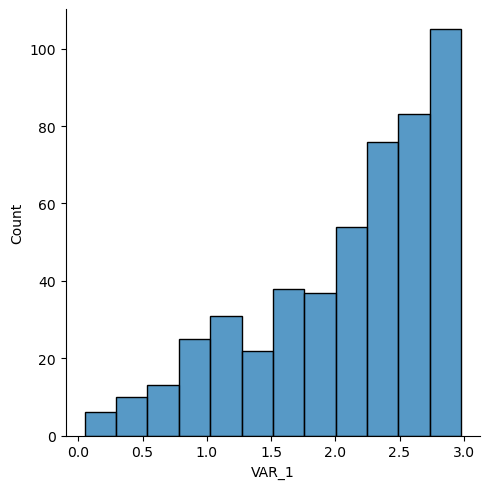

In [9]:
# entendendo a distribuição da variável VAR_1

sns.displot(registros['VAR_1'])
plt.show()


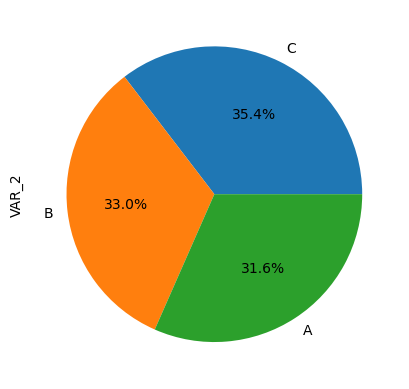

In [ ]:
# grafico de setores para a variável VAR_2

registros['VAR_2'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()



# Analise Diagnostica

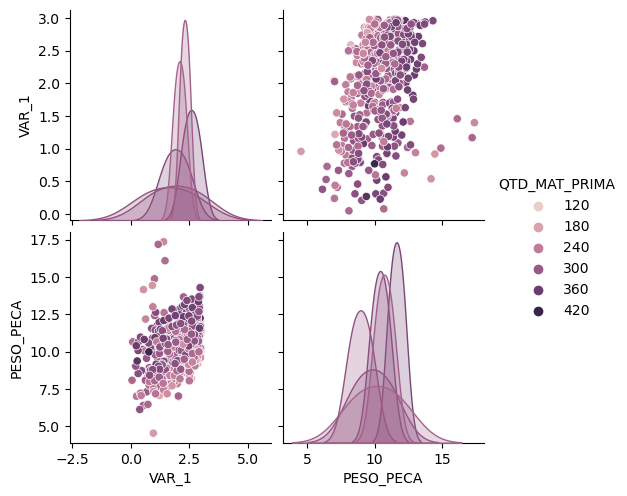

/tmp/ipykernel_30891/3091957589.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = registros.corr()


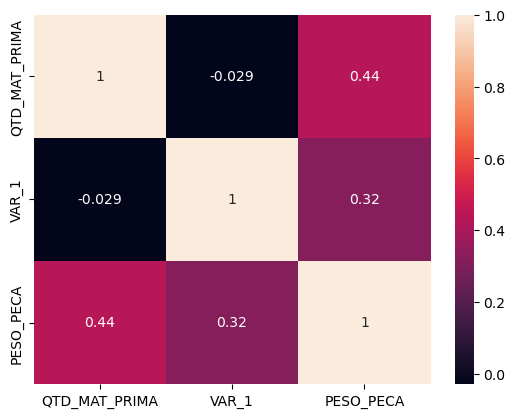

In [14]:
# Identicando a distribuição dos dados
sns.pairplot(registros, hue='QTD_MAT_PRIMA', diag_kind='kde')
plt.show()

# Identificando a correlação entre as variáveis

correlacao = registros.corr()
sns.heatmap(correlacao, annot=True)
plt.show()


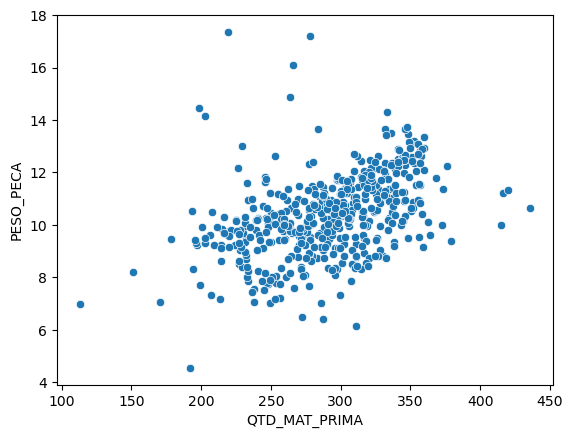

In [15]:
# Correlação entre as variáveis QTD_MAT_PRIMA e PESO_PECA

sns.scatterplot(x='QTD_MAT_PRIMA', y='PESO_PECA', data=registros)
plt.show()



Uma maneira de utilizar essa fórmula no estudo de caso é incorporá-la à análise dos dados para entender como o custo varia com o peso das peças produzidas. Usamos a metrica para calcular o custo para cada peso de peça e então visualizar como o custo total varia com o peso.

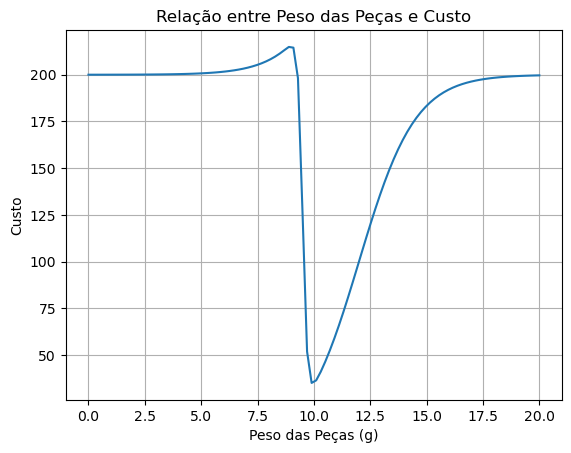

In [16]:
# Metrica de custo por peça
# Função de custo

def custo(p):
    return 200 / (1 + np.exp(10 * (p - 9.5))) + 200 / (1 + np.exp(-0.8 * (p - 12)))

# Gerar valores de peso das peças
peso = np.linspace(0, 20, 100)  # Vamos considerar pesos de 0 a 20 gramas

# Calcular o custo para cada valor de peso
custo_peso = custo(peso)

# Plotar o gráfico
plt.plot(peso, custo_peso)
plt.xlabel('Peso das Peças (g)')
plt.ylabel('Custo')
plt.title('Relação entre Peso das Peças e Custo')
plt.grid(True)
plt.show()

In [32]:
# Calculando o custo para cada peça
registros['CUSTO'] = custo(registros['PESO_PECA'])
registros.head()




,QTD_MAT_PRIMA,VAR_1,VAR_2,PESO_PECA,CUSTO
0,320.15,0.88,A,10.144919,37.278717
1,320.14,1.55,A,11.547027,82.076805
2,284.85,2.97,A,11.112109,65.905963
3,263.92,2.36,C,9.900123,35.014600
4,276.22,2.98,C,10.079822,36.024115


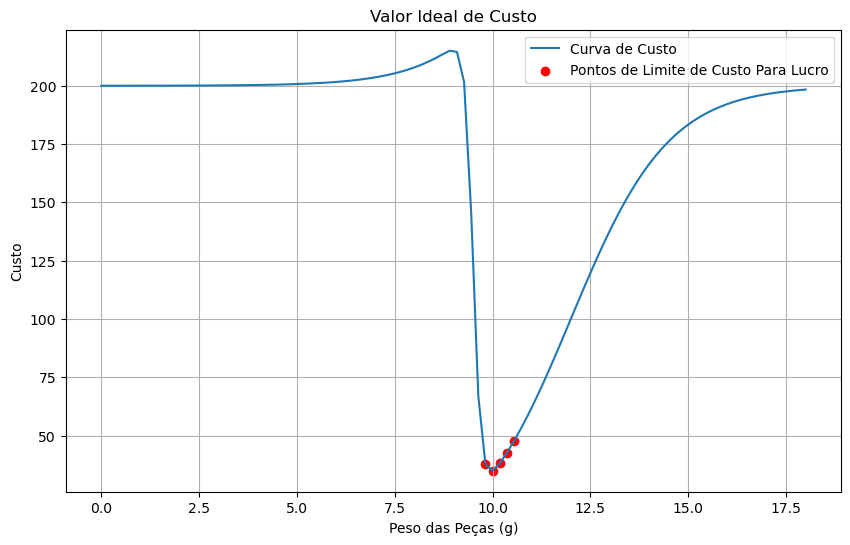

In [46]:

# Definir a função de custo
def custo(p):
    return 200 / (1 + np.exp(10 * (p - 9.5))) + 200 / (1 + np.exp(-0.8 * (p - 12)))

# Gerar valores de peso das peças
peso = np.linspace(0, 18, 100)  # Vamos considerar pesos de 0 a 18 gramas

# Calcular o custo para cada valor de peso
custo_peso = custo(peso)

# Definir o valor limite de custo
custo_limite = 40  # Pode ajustar conforme necessário

# Definir o limite de distância para selecionar pontos próximos ao valor ideal de custo
limite_distancia = 10  # Pode ajustar conforme necessário

# Encontrar os índices dos pontos mais próximos ao valor ideal de custo
indices_proximos = np.abs(custo_peso - custo_limite) < limite_distancia

# Plotar o gráfico com os pontos selecionados
plt.figure(figsize=(10, 6))
plt.plot(peso, custo_peso, label='Curva de Custo')
plt.scatter(peso[indices_proximos], custo_peso[indices_proximos], color='red', label='Pontos de Limite de Custo Para Lucro') 
plt.xlabel('Peso das Peças (g)')
plt.ylabel('Custo')
plt.title('Valor Ideal de Custo')
plt.legend()
plt.grid(True)
plt.show()


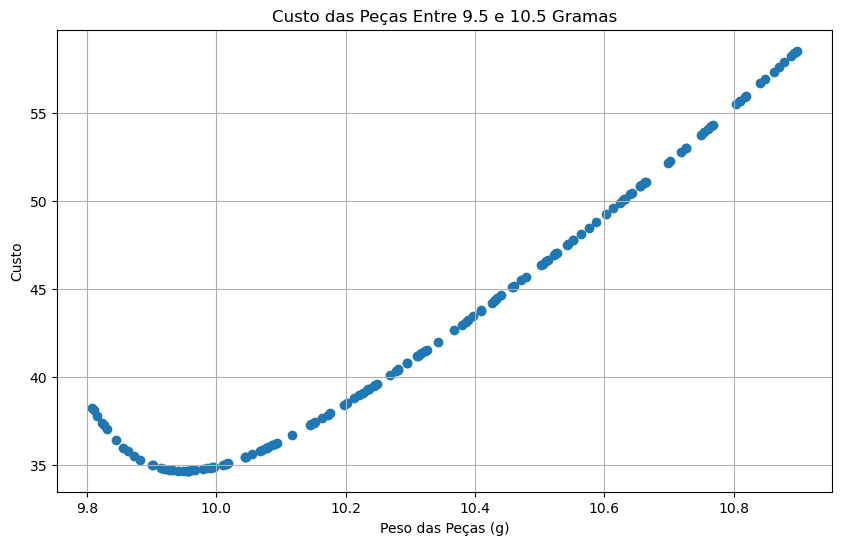

In [50]:
# Peso das peças entre 90 e 100 gramas

registros[(registros['PESO_PECA'] >= 9.8) & (registros['PESO_PECA'] <= 10.9)]

# grafico das peças entre 9 e 10 gramas e custo

plt.figure(figsize=(10, 6))
plt.scatter(registros[(registros['PESO_PECA'] >= 9.8) & (registros['PESO_PECA'] <= 10.9)]['PESO_PECA'], registros[(registros['PESO_PECA'] >= 9.8) & (registros['PESO_PECA'] <= 10.9)]['CUSTO'])
plt.xlabel('Peso das Peças (g)')
plt.ylabel('Custo')
plt.title('Custo das Peças Entre 9.8 e 10.9 Gramas')
plt.grid(True)
plt.show()



In [51]:
# Novo dataset com as peças entre 9 e 10 gramas

peca_9_10 = registros[(registros['PESO_PECA'] >= 9.8) & (registros['PESO_PECA'] <= 10.9)]


In [56]:
peca_9_10.describe()

,QTD_MAT_PRIMA,VAR_1,PESO_PECA,CUSTO
count,151.000000,151.000000,151.000000,151.000000
mean,288.439272,2.196093,10.329244,43.128573
std,40.564087,0.690631,0.315323,7.373029
min,193.350000,0.080000,9.808528,34.690631
25%,259.225000,1.865000,10.045294,36.087867
50%,291.190000,2.410000,10.313551,41.260145
75%,311.425000,2.715000,10.595197,49.063775
max,436.070000,2.980000,10.897459,58.551522


# Analise Preditiva

Coeficiente Angular: 35.22159340407977
Coeficiente Linear: -75.37316529167737
R²: 0.07496285246187862
Quantidade de Matéria-Prima para uma Peça de 10 Gramas: 276.84276874912035


/home/vini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


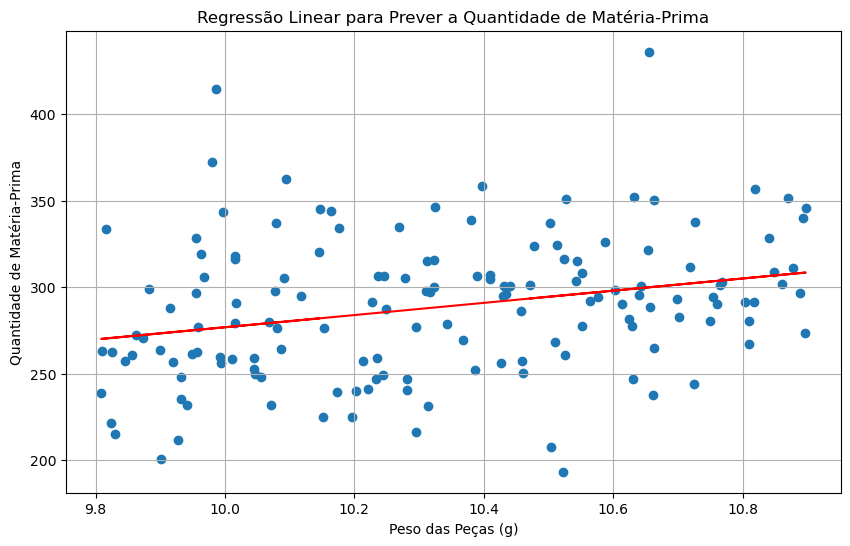

In [61]:
from sklearn.linear_model import LinearRegression

# Regressão linear para prever a quantidade de matéria-prima com base no peso da peça
modelo = LinearRegression()
modelo.fit(peca_9_10[['PESO_PECA']], peca_9_10['QTD_MAT_PRIMA'])

# Coeficientes da regressão
print('Coeficiente Angular:', modelo.coef_[0])
print('Coeficiente Linear:', modelo.intercept_)
print('R²:', modelo.score(peca_9_10[['PESO_PECA']], peca_9_10['QTD_MAT_PRIMA']))

# Prever a quantidade de matéria-prima para uma peça de 10 gramas
peso_peca = 10
qtd_mat_prima = modelo.predict([[peso_peca]])[0]
print('Quantidade de Matéria-Prima para uma Peça de 10 Gramas:', qtd_mat_prima)

# Plotar a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(peca_9_10['PESO_PECA'], peca_9_10['QTD_MAT_PRIMA'])
plt.plot(peca_9_10['PESO_PECA'], modelo.predict(peca_9_10[['PESO_PECA']]), color='red')
plt.xlabel('Peso das Peças (g)')
plt.ylabel('Quantidade de Matéria-Prima')
plt.title('Regressão Linear para Prever a Quantidade de Matéria-Prima')
plt.grid(True)
plt.show()


In [62]:
# machine learning para prever a quantidade de matéria-prima para uma peça de 10 gramas

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Dividir o dataset em treino e teste
X = registros[['PESO_PECA']]
y = registros['QTD_MAT_PRIMA']

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo
modelo = LinearRegression()
modelo.fit(X_treino, y_treino)

# Prever a quantidade de matéria-prima para uma peça de 10 gramas
peso_peca = 10
qtd_mat_prima = modelo.predict([[peso_peca]])[0]
print('Quantidade de Matéria-Prima para uma Peça de 10 Gramas:', qtd_mat_prima)




Quantidade de Matéria-Prima para uma Peça de 10 Gramas: 287.11461010458356


/home/vini/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
# Avaliar o modelo
y_pred = modelo.predict(X_teste)
mse = mean_squared_error(y_teste, y_pred)
print('Erro Quadrático Médio:', mse)



Erro Quadrático Médio: 1445.6657075314233


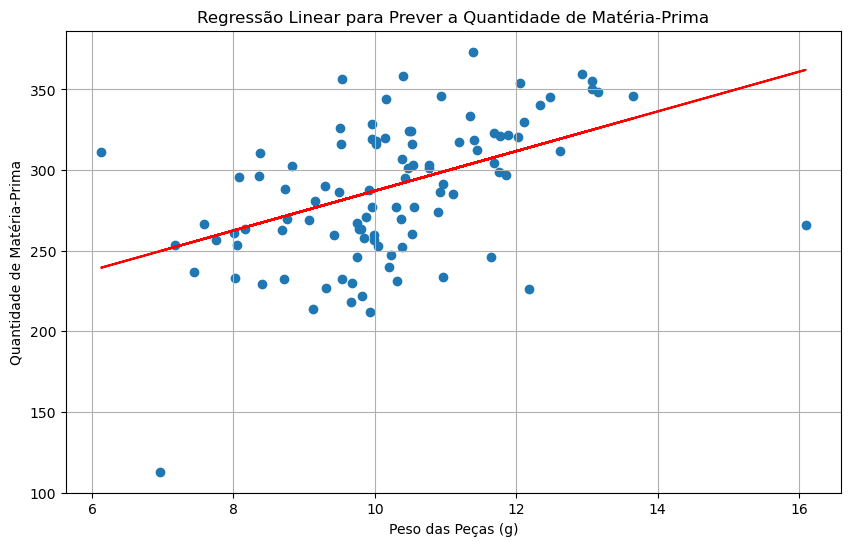

In [64]:
# Plotar a reta de regressão
plt.figure(figsize=(10, 6))
plt.scatter(X_teste, y_teste)
plt.plot(X_teste, y_pred, color='red')
plt.xlabel('Peso das Peças (g)')
plt.ylabel('Quantidade de Matéria-Prima')
plt.title('Regressão Linear para Prever a Quantidade de Matéria-Prima')
plt.grid(True)
plt.show()


